## **Objective** 

In this project I have analyzed a dataset and built predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 
Iweou can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.


### **Imports**

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## **Data Exploration**

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Renaming the columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [10]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

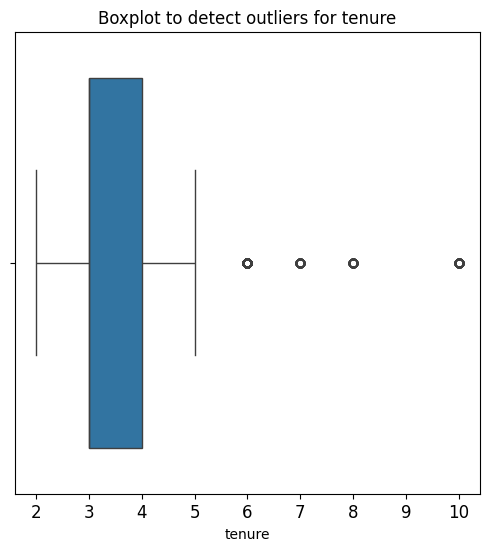

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

print("percentile25:", percentile25)
print("percentile75:", percentile75)
print("Interquartile Range:", iqr)

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

percentile25: 3.0
percentile75: 4.0
Interquartile Range: 1.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

To gain deeper insights into employee turnover, I investigated the relationship between the number of projects undertaken and employee retention. I employed a dual visualization approach:

    Stacked Boxplot: This revealed the distributions of average monthly hours worked across different numbers of projects, segmented by employees who stayed versus those who left. This method highlighted potential trends or outliers in work-hour patterns associated with retention.

    Stacked Histogram: Recognizing the limitations of boxplots in conveying sample sizes, I additionally created a stacked histogram to visualize the distribution of employees across various project counts for both retained and departed groups. This provided a clearer understanding of the relative proportions of employees undertaking different project loads within each retention category.

This combined visualization strategy enabled me to effectively contrast the work-hour patterns and project engagement levels between stayers and leavers, offering valuable insights for informing workforce retention strategies.

#### Project Participation and Employee Retention

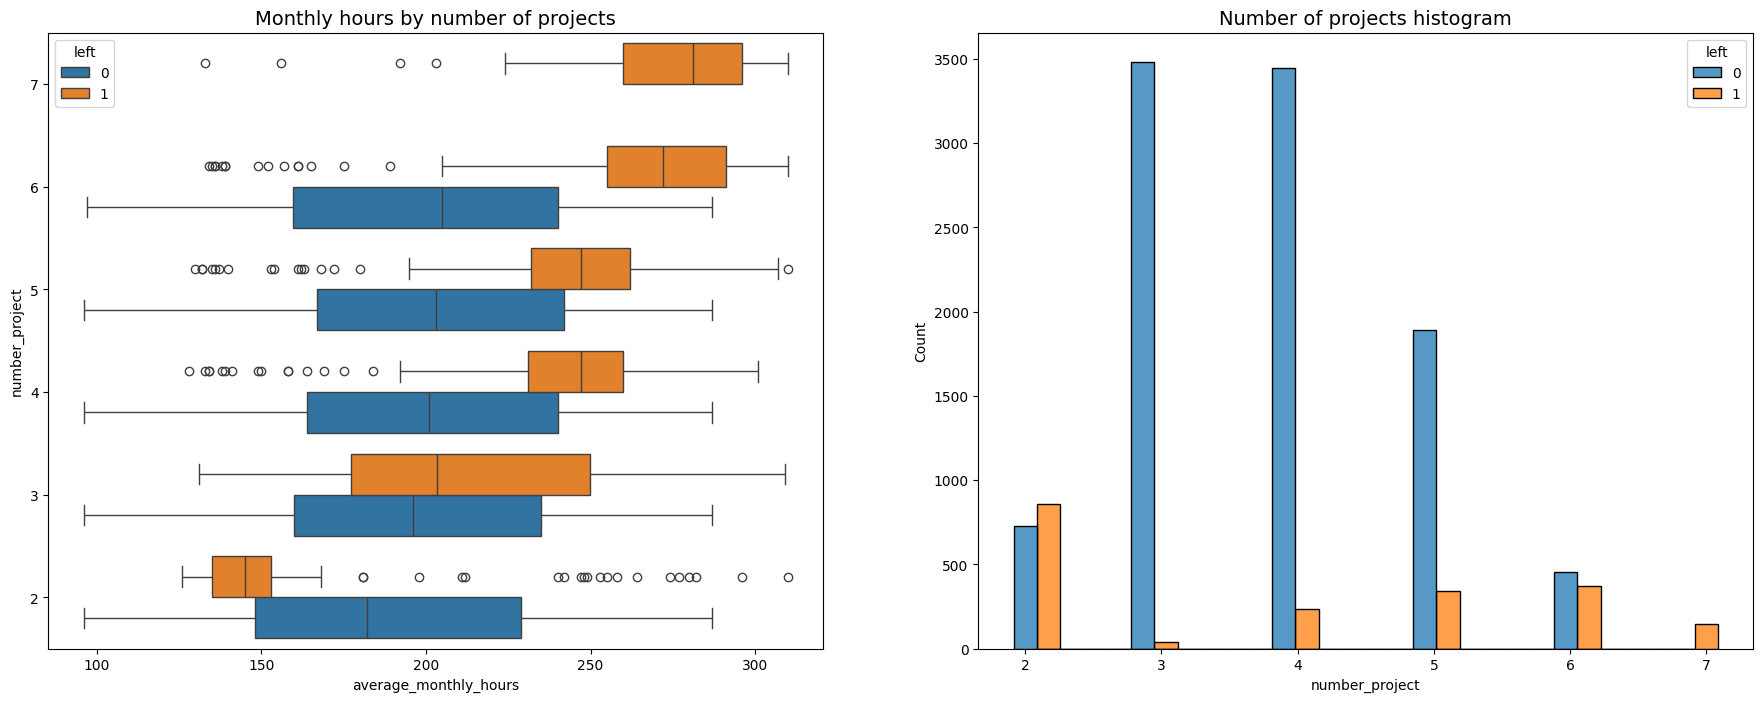

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))


sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()


Key Insights from Project Participation and Employee Retention:

1. Project Load and Work Hours: A positive correlation exists between project involvement and work hours. Employees with more projects tend to work longer.

2. Departing Employee Profiles: Two distinct groups of departing employees emerge:

    Group A: Worked significantly fewer hours than peers with similar project loads. Possible explanations include termination or planned departure (reduced hours due to notice period).
    Group B: Worked significantly more hours than peers. Likely high contributors, potentially leading to burnout and resignation.

3. Optimal Project Load for Retention: The 3-4 project range exhibits the lowest departure rate, suggesting potential workload sweet spot.

4. Potential Overwork: Assuming a standard workweek and vacation, most employee groups, except those with 2 projects, exceeded expected monthly work hours. This suggests potential overwork across the board.

In [17]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

#### Employee Work Hours and Satisfaction Analysis

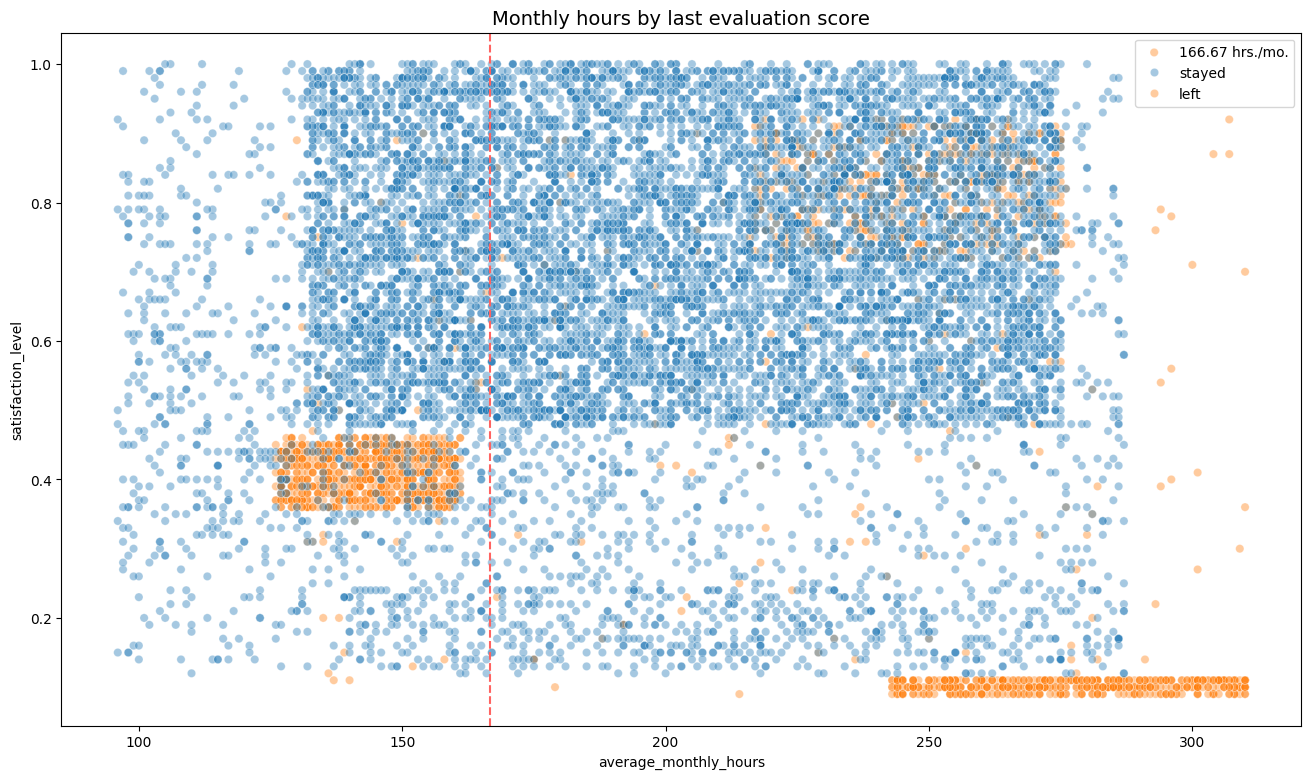

In [20]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Employee Work Hours and Satisfaction Analysis:

The provided scatterplot reveals several key findings regarding employee work hours and satisfaction:

1. High Workload and Low Satisfaction: A significant portion of employees worked excessive hours, exceeding 75 hours per week on average. This likely contributed to their near-zero satisfaction, suggesting potential burnout or overwork.

2. Moderate Hours and Lower Satisfaction: Though working relatively normal hours, another group of departing employees still reported only moderate satisfaction (around 0.4). This could be attributed to perceived pressure to match the high workload of their peers, negatively impacting their satisfaction.

3. Optimal Workload and High Satisfaction: A smaller group working moderate hours (210-280 per month) displayed significantly higher satisfaction (0.7-0.9). This suggests a potential sweet spot between workload and employee well-being.

Note: The data distribution's unusual shape raises concerns about potential data manipulation or synthetic data usage. Further investigation is recommended.

#### Employee Turnover and Satisfaction Insights

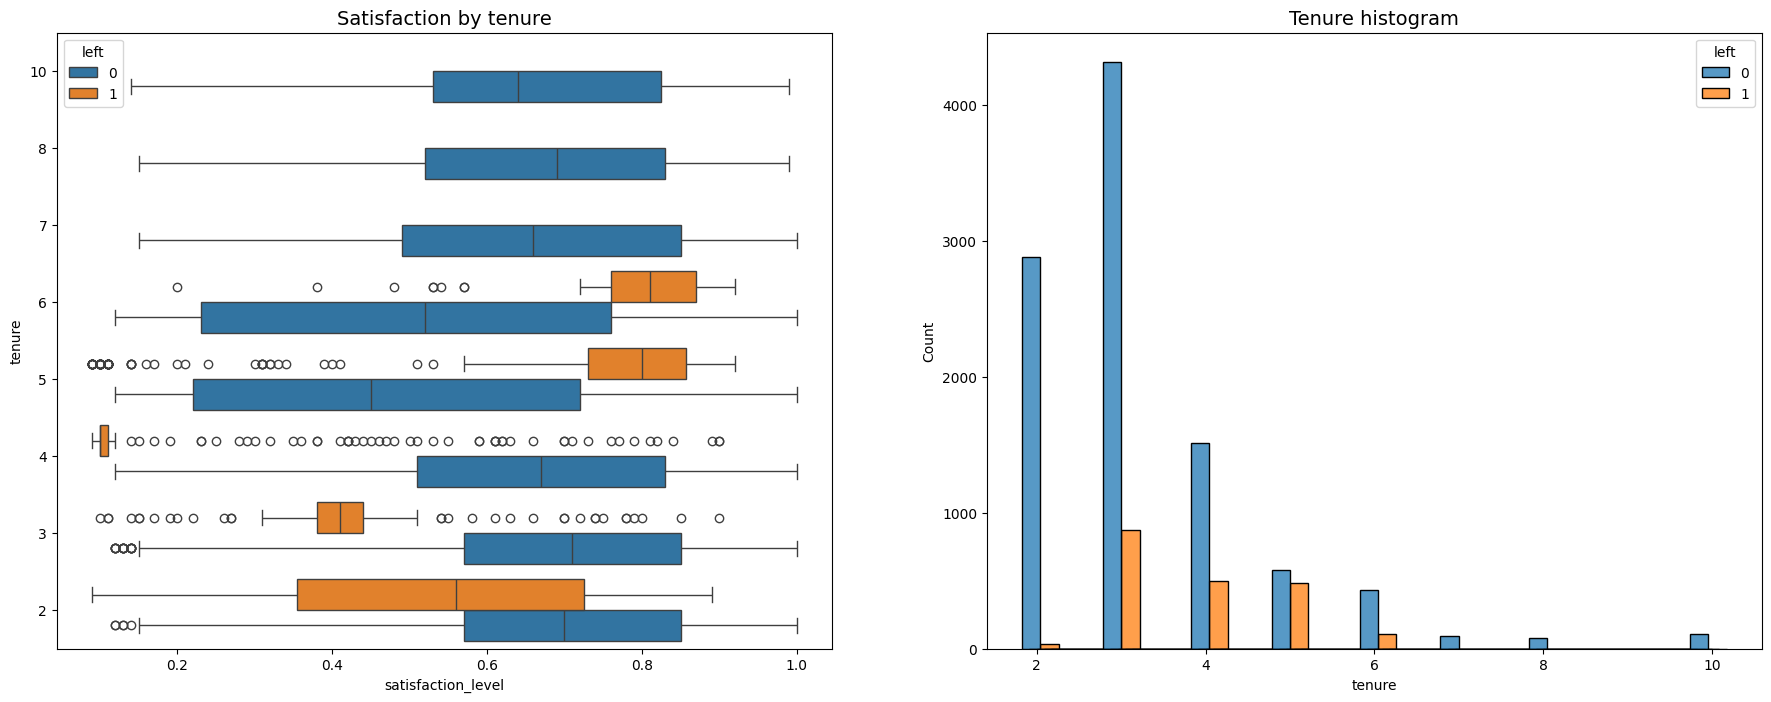

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Employee Turnover and Satisfaction Insights:

Departing Employees: Two distinct groups emerge:

- Dissatisfied Short-Timers: Low satisfaction and shorter tenures, suggesting potential reasons for their departure.
- Highly Satisfied Mid-Timers: High satisfaction and medium-tenures, potentially reflecting positive experiences.
    
Four-Year Anomaly: Employees leaving at the four-year mark exhibit notably lower satisfaction. Investigating company policies impacting this specific group could be valuable.
    
Tenure and Satisfaction:
- Longest Tenure: These employees have high satisfaction and remain with the company, similar to newer satisfied employees.
- Tenure Distribution: The histogram reveals a smaller pool of longer-tenured employees, possibly indicating higher positions and salaries.

#### Employee Satisfaction Scores

In [24]:
df1.groupby(['left'])['satisfaction_level'].agg(["mean", "median"])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41



As expected, departing employees exhibit lower average and median satisfaction scores compared to those who remain. Interestingly, the mean satisfaction score among stayers dips slightly below the median, suggesting a potential leftward skew. This means a smaller number of highly satisfied employees might be balancing out a larger group with slightly lower satisfaction levels.

#### Tenure and Salary Distribution:

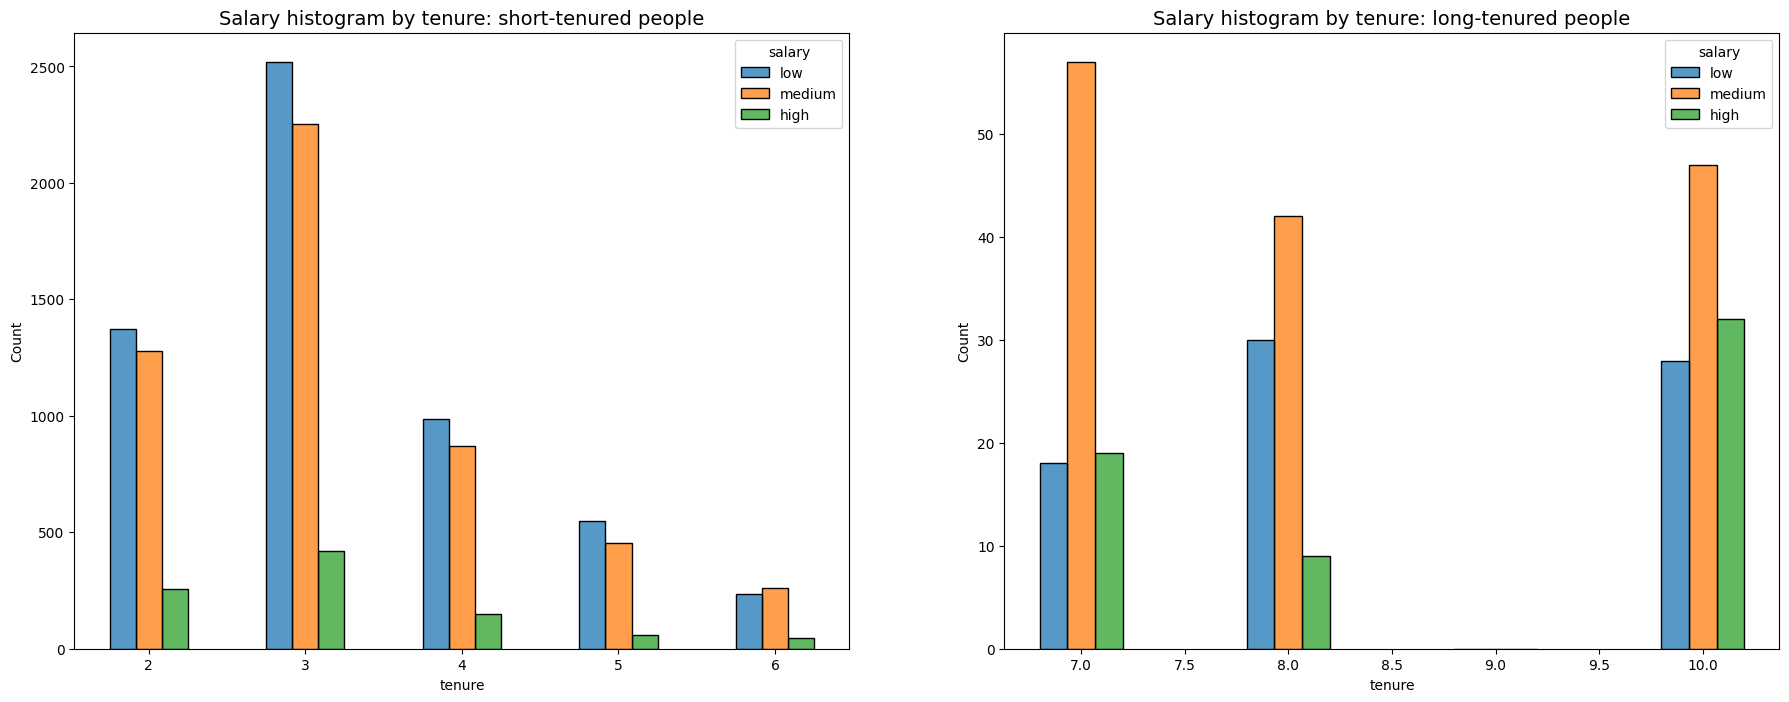

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]


sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')


sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


The provided plots reveal that longer tenure does not directly translate to higher salaries. This finding challenges the potential assumption of tenure-based pay structuretions.

#### Work Hours and Performance

An interesting next step would be to investigate the relationship between work hours and employee performance. Creating a scatterplot of average monthly hours versus last evaluation scores could shed light on whether extended work hours correlate with higher evaluations.

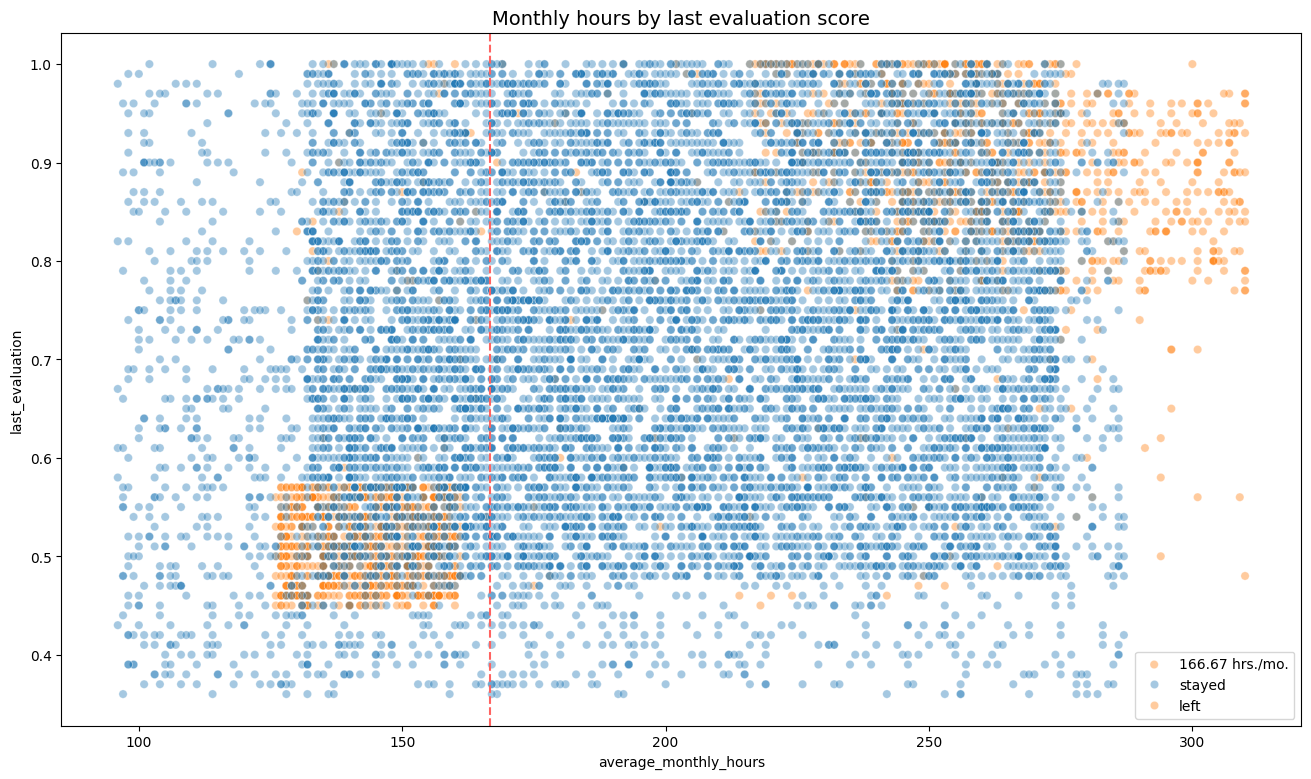

In [27]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Key Insights from Work Hours and Performance:

Departing Employees: Two distinct groups emerge:

- Overworked High-Performers: High evaluation scores but significantly exceeding average work hours, suggesting potential burnout or unsustainable effort.
- Underworked Low-Performers: Working marginally less than average but with lower evaluation scores, highlighting potential performance concerns not directly linked to long hours.

Work Hours and Performance: A possible correlation exists between longer work hours and higher evaluation scores. However, the data distribution indicates:

- Limited Presence: A relatively small share of employees occupy the high-performance, low-workload zone, suggesting working long hours doesn't guarantee top evaluations.
- Overwork Prevalence: The majority of employees significantly exceed the 167-hour monthly average, possibly highlighting broader company culture or workload considerations.

#### Work Hours and Promotion

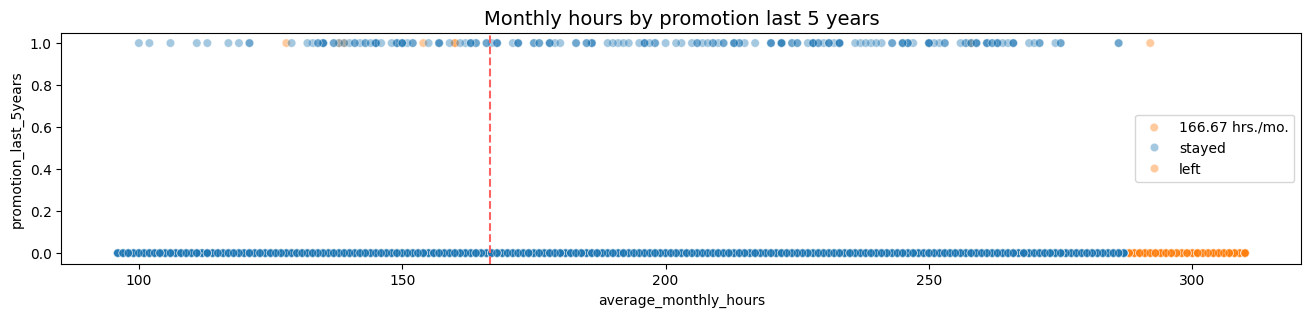

In [29]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- Promotions and Retention: Notably, employees promoted within the past five years rarely left the company, suggesting potential job satisfaction and career growth opportunities.- 
Workload and Promotions: Contrary to expectations, individuals working the most hours were not significantly represented among those promoted. This implies other factors beyond sheer effort play a role in promotion decisions
- Turnover and Workload: Interestingly, all departing employees displayed high work hours, potentially indicating burnout or workload-related factors contributing to their decision to leave.e.

In [30]:
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

#### Departmental Turnover

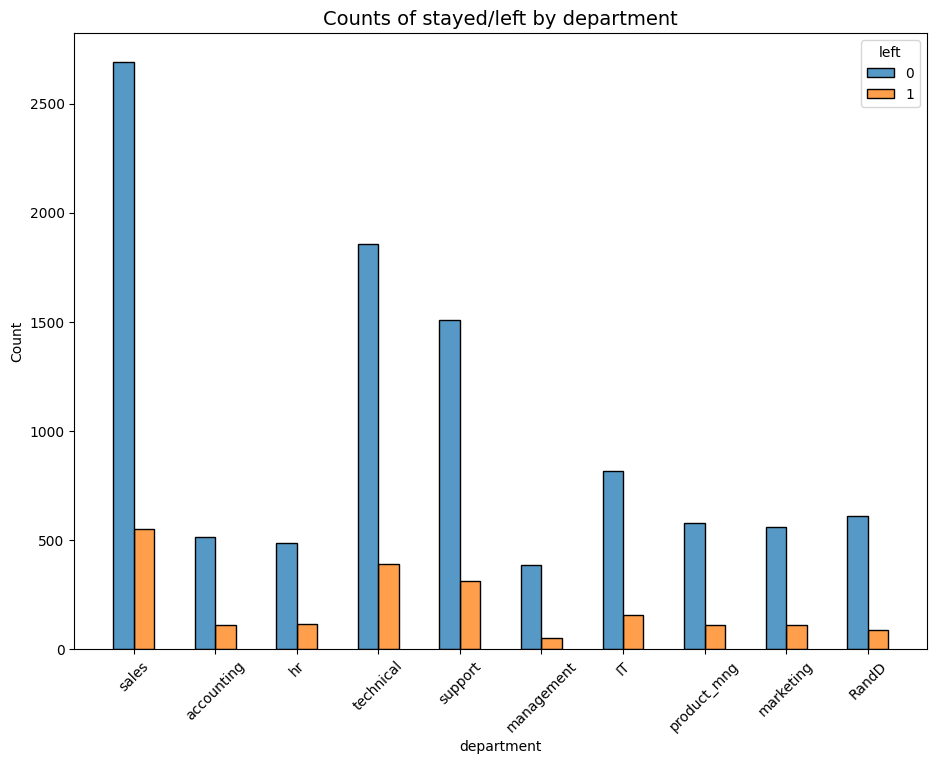

In [33]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

Based on the visualized department distribution, no single department displays a statistically significant difference in the proportion of employees who left compared to those who stayed. This suggests turnover might not be concentrated in any specific department, indicating potential company-wide factors influencing employee retention.

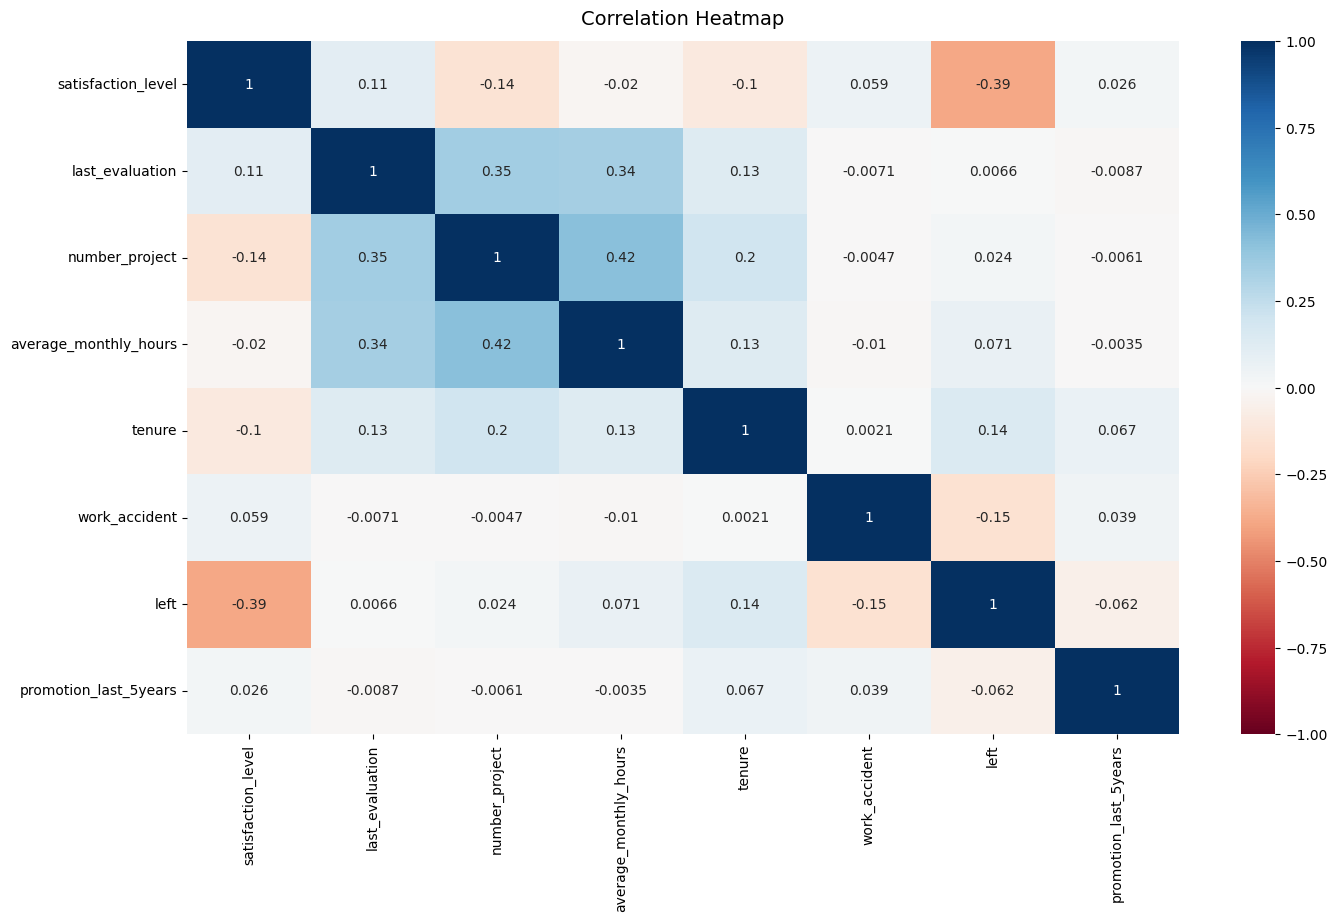

In [39]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.select_dtypes(include=[np.number]).corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu",as_cmap=True ))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Positive Correlations:- Number of Projects & Monthly Hours: Taking on more projects tends to coincide with longer work hours.
- Monthly Hours & Evaluation Scores: Employees working extended hours seem to receive higher evaluation scores on average.

Negative Correlation:
- Satisfaction Level & Leaving: Lower employee satisfaction levels correlate with a higher likelihood of leaving the company.ompany.

#### Insights

1. Workload Overload and Dissatisfaction:

    Correlation: Longer work hours, higher project loads, and lower satisfaction levels are associated with increased employee turnover. This suggests potential overwork and burnout leading to employees leaving the company.
    Burnout Risk: The sizeable group of overworked employees indicates a potential burnout problem that needs to be addressed to improve retention.

2. Lack of Recognition and Reward:

    Disconnect: Long hours and many projects don't seem to guarantee promotions or high evaluation scores. This suggests a misalignment between effort and reward, potentially demotivating employees and contributing to their departure.

3. Tenure and Retention:

    Loyalty: Employees who have been with the company for more than six years appear to be more likely to stay. This indicates potential increased loyalty and engagement with longer tenure, suggesting strategies to improve experiences for newer employees.

Overall:

These insights suggest that workload management, employee recognition, and career development opportunities could be key areas to address to improve employee retention.

## **Model Building**

#### Logistic regression

Department is a categorical variable, which means you can dummy it for modeling.

Salary, while categorized, holds inherent order (0-2). To preserve this hierarchy, it was encoded numerically (0-2) instead of using dummy variables.


In [42]:
df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Heatmap to visualize how correlated variables are

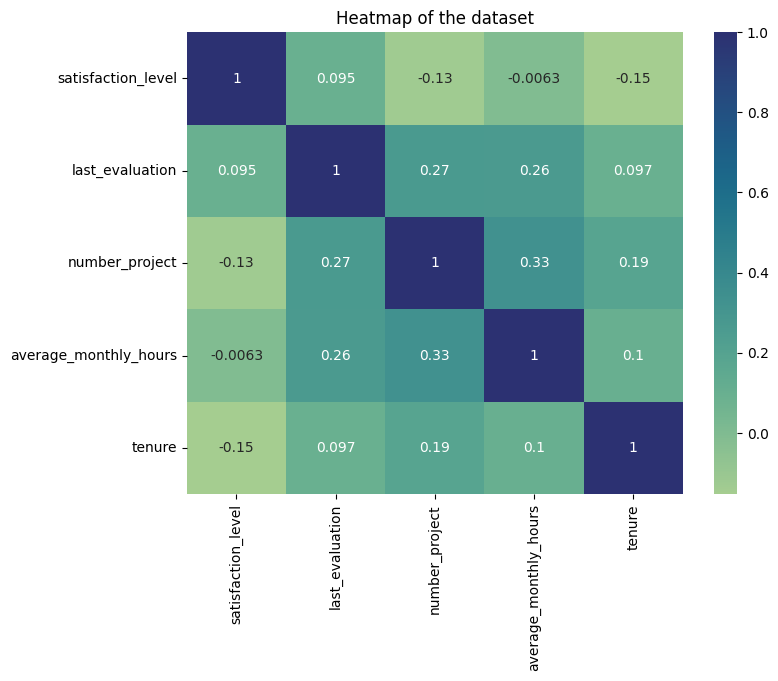

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

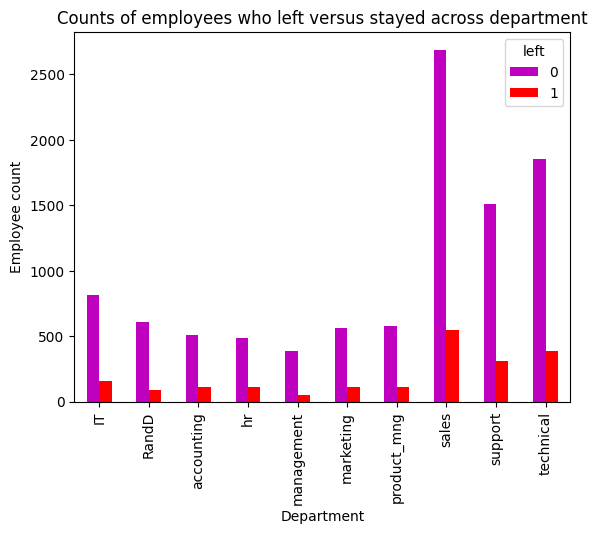

In [44]:
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [49]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [50]:
# Isolate the outcome variable
y = df_logreg['left']

y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [51]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [52]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [53]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [54]:
y_pred = log_clf.predict(X_test)

#### Confusion matrix

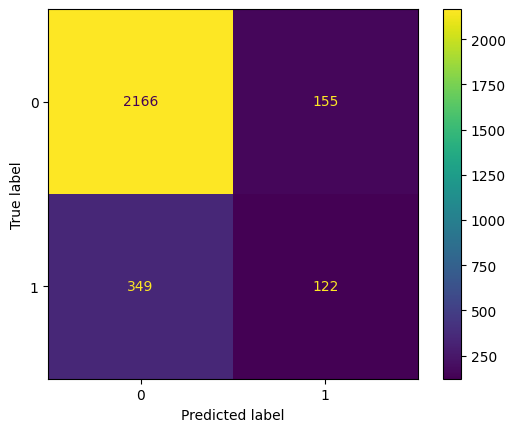

In [55]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.



#### Understanding Class Balance for Accurate Interpretation:

Before diving into accuracy metrics, it's crucial to assess the class balance within the dataset. In a binary classification task, this involves examining the distribution of values in the target variable—in this case, the "left" column. This balance reveals whether one class (e.g., those who left) is significantly more prevalent than the other, which can substantially influence how we interpret accuracy scores.

In [56]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

An initial analysis of the target variable ("left" column) reveals an approximately 83%-17% split between the two classes. While not perfectly balanced, this imbalance isn't severe enough to warrant immediate resampling. Nevertheless, it's essential to be mindful of this distribution when evaluating model performance.|

Potential Impact on Metrics:

In cases of significant imbalance, accuracy alone might not be the most reliable metric. Metrics like precision, recall, and F1-score can offer a more nuanced picture of how well the model identifies both minority and majority classes.

Next Steps:
- Calculate Key Metrics: I will explore various metrics beyond accuracy to assess the model's performance comprehensively.
- Monitor for Issues: While resampling isn't necessary based on the current balance, I will remain vigilant for any potential issues arising from it during ongoing evaluation.

In [58]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Evaluating Model Performance for Key Class:

While the classification report reveals promising overall performance (precision: 79%, recall: 82%, F1-score: 80%, accuracy: 82%), it's crucial to consider these metrics in the context of predicting departing employees, our primary concern.

### Tree-based Models

This approach covers implementation of Decision Tree and Random Forest.

In [60]:
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [61]:
X = df_enc.drop('left', axis=1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

A decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [115]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 7.78 s
Wall time: 10.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [68]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [69]:
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [70]:
def make_results(model_name:str, model_object, metric:str):



    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }


    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [71]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

While the decision tree model scores suggest promising performance, it's important to remember the potential for overfitting. Decision trees are prone to this issue, where they closely model the training data but lose generalizability to unseen data.

To address this concern, we can leverage the power of ensemble methods like random forests. These models combine multiple decision trees (hence the "forest") and average their predictions, leading to more robust and less overfitted results.

Therefore, constructing a random forest model next is a logical step. Its inherent averaging mechanism should improve generalization and provide a more reliable assessment of our ability to predict employee departures.

#### Random forest - Round 1

In [114]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [73]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 26min 12s
Wall time: 1h 5min 8s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [75]:
import os
print(os.getcwd())

C:\Users\Eashwar\Projects


In [77]:
path = r'C:\Users\Eashwar\Projects'

In [78]:
def write_pickle(path, model_object, save_as:str):

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [79]:
def read_pickle(path, saved_model_name:str):
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [80]:
write_pickle(path, rf1, 'hr_rf1')

In [81]:
rf1 = read_pickle(path, 'hr_rf1')

In [82]:
rf1.best_score_

0.9804250949807172

In [83]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [84]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Random Forest Outperforms Decision Tree, Ready for Final Test:

The random forest model delivers generally superior evaluation scores compared to the decision tree model, showcasing stronger overall performance. Notably, all metrics except recall exhibit improvements, with the recall difference being a negligible 0.001. This confirms the effectiveness of the random forest in tackling potential overfitting concerns present in the decision tree model.

Next Steps: Final Validation and Insights:

With this encouraging outcome, the next crucial step is to evaluate the final random forest model  ndent test set. This validation will yield a more realistic assessment of its generalizability and predictive power for unseen data. Additionally, deeper analysis of the model's predictions and feature importance scores can provide valuable insights into the key factors influencing employee departures, aiding in informed decision-making.

In [85]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [86]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

Strong Generalizability Demonstrated by Final Test:

The model's performance on the independent test set closely aligns with the validation scores, which is a highly positive sign. This consistency indicates strong generalizability and suggests the model's ability to effectively predict employee departures on unseen data.

Confidence in Prediction and Future Applications:

The fact that the test set was exclusively reserved for this model evaluation further enhances our confidence in its true predictive power. This outcome demonstrates the model's robustness and reliability, paving the way for potential applications in real-world scenarios.

#### Feature Engineering

Addressing Potential Data Leakage and Feature Engineering:

While the high evaluation scores are encouraging, it's crucial to acknowledge the possibility of data leakage, which inflates a model's performance when trained on information unavailable in future real-world scenarios.

Scrutinizing Potential Leak Sources:
- Missing Satisfaction Data: The company might not have access to complete satisfaction data for all employees, creating a potential leak when using it during training.
- Pre-departure Hours Drop: "Average_monthly_hours" could leak information if departing employees work fewer hours beforehand, as this change might not be observed in unseen data.

Combating Leakage for a Reliable Model:
- Removing Potentially Leaky Feature: Dropping "satisfaction_level" from the features helps address the first concern.
- Creating Meaningful Feature: Constructing a new binary feature like "overworked" based on relevant criteria can capture workload trends without relying on unavailable future data.

In [87]:
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [88]:
df2['overworked'] = df2['average_monthly_hours']

print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


On average, someone working full-time (5 days/week, 8 hours/day, 50 weeks/year) logs about 167 hours per month.
o identify employees potentially experiencing workload overload, we defined 'overworked' as exceeding 175 monthly hours on average.
We created a new 'overworked' column where employees with >175 monthly hours were marked as '1' (overworked), others were marked as '0' (not overworked).

This binary feature 'overworked' might enhance the model's ability to capture workload-related factors influencing employee departures.

In [89]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [90]:
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [91]:
y = df2['left']

X = df2.drop('left', axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [93]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [94]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 6.47 s
Wall time: 8.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [95]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [96]:
tree2.best_score_

0.9586752505340426

In [97]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


While some evaluation metrics slightly decreased compared to the previous models, this is anticipated as fewer features were used during training. Overall, the performance remains strong

#### Random forest - Round 2

In [98]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [102]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 28min 24s
Wall time: 49min 41s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [103]:
write_pickle(path, rf2, 'hr_rf2')

In [104]:
rf2 = read_pickle(path, 'hr_rf2')

In [105]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [106]:
rf2.best_score_

0.9648100662833985

In [107]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


There is a slight decrease in performance for both models. However, considering our focus on AUC, the Random Forest remains superior. It's time to assess its generalizability on the held-out test set

In [108]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

Based on the evaluation scores, especially the chosen AUC metric, the Random Forest emerges as a stable and well-performing final model. To gain deeper insights into its prediction patterns on unseen data, let's now visualize its performance on the independent test set using a confusion matrix.

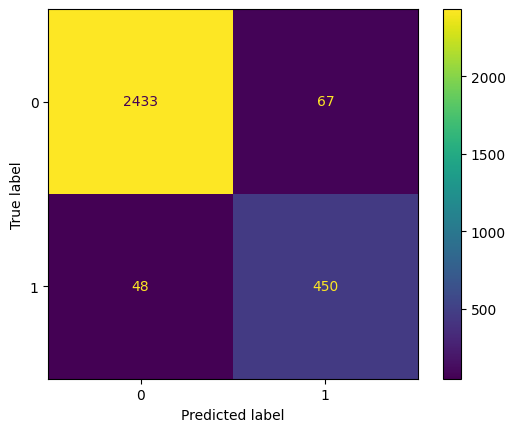

In [109]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

Examining the confusion matrix reveals more false positives than false negatives, implying the model might occasionally identify employees as likely to leave when they don't. However, its overall performance remains strong.

#### Decision tree splits

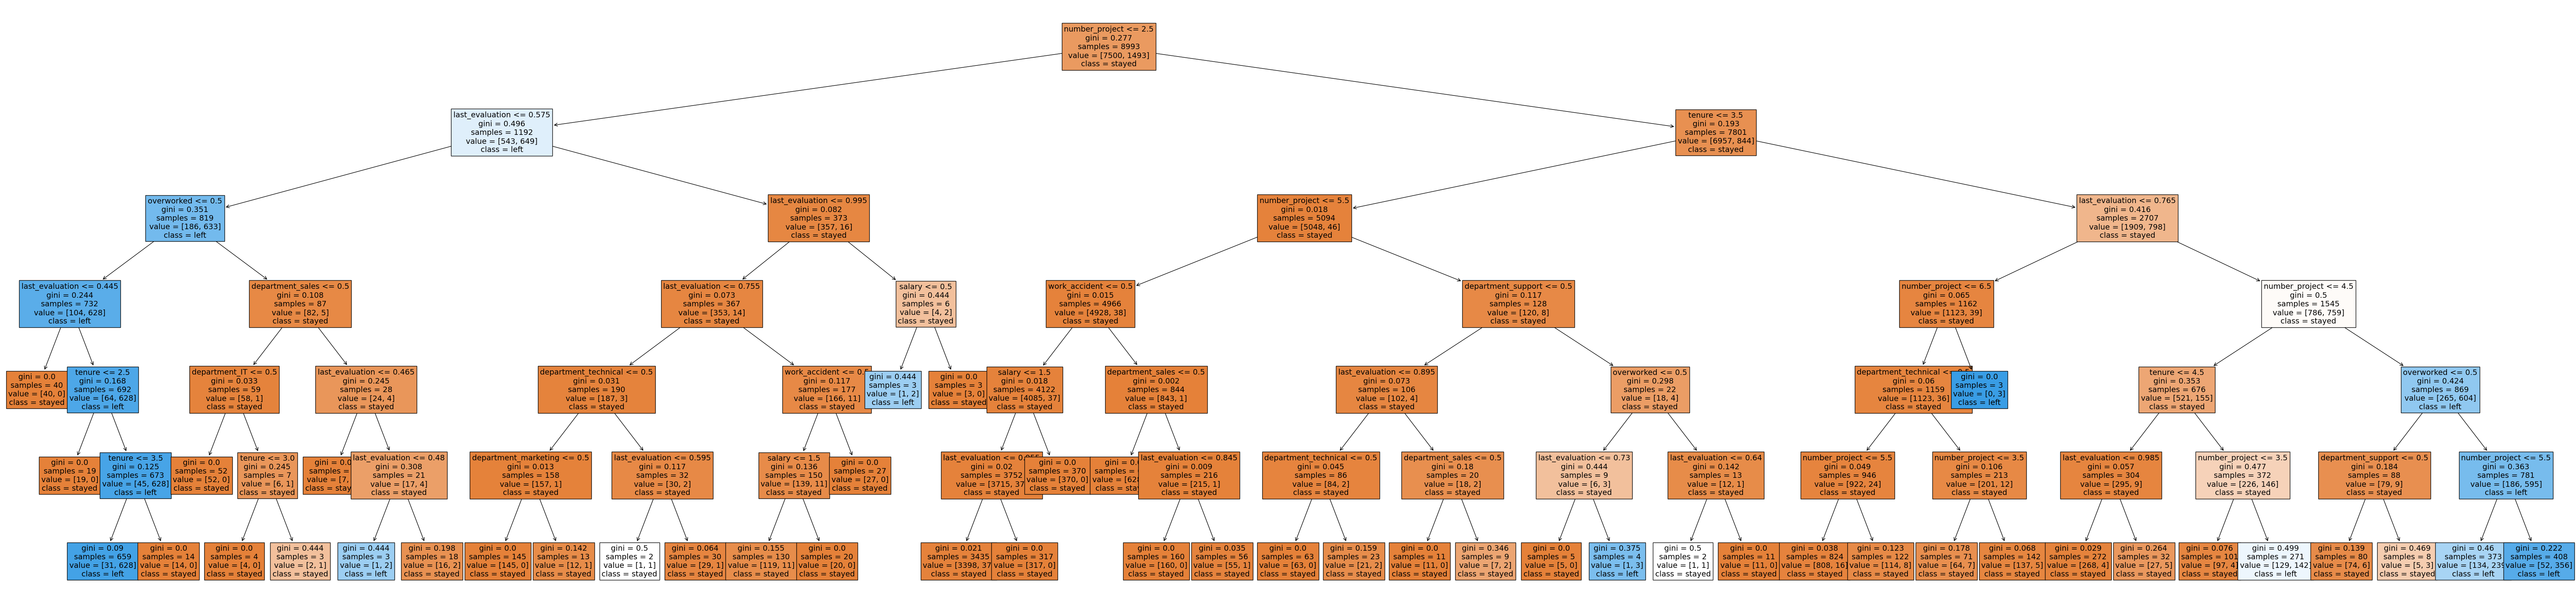

In [110]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [111]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

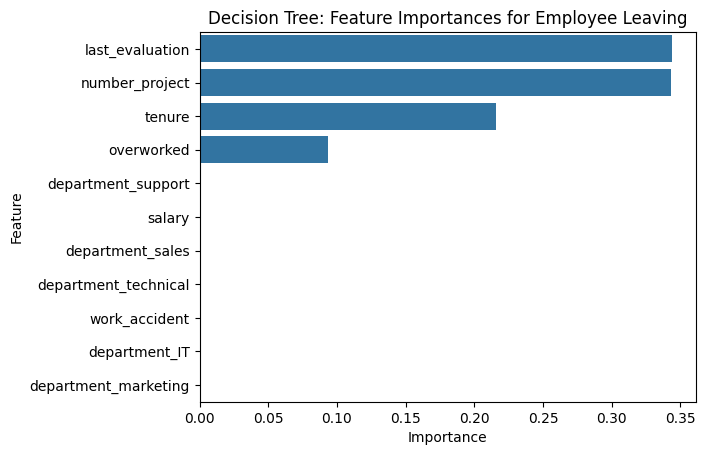

In [112]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The bar chart reveals that performance reviews (last_evaluation), project workload (number_project), employment duration (tenure), and potential overwork are the key factors considered by the decision tree model to predict employee departures.

#### Random forest feature importance

Feature importances for the random forest model.

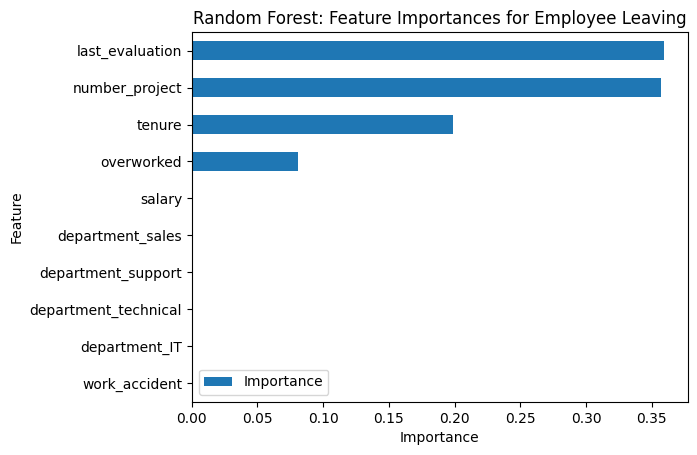

In [113]:
feat_impt = rf2.best_estimator_.feature_importances_

ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Both models emphasize the impact of performance reviews, project workload, employment duration, and potential overwork on employee departure predictions, suggesting their generalizability and importance in this context.

Key Findings and Insights:

    Both decision tree and random forest models consistently identified workload, performance reviews, tenure, and potential overwork as significant factors influencing employee departures.
    This analysis suggests that employee overwork might be a major contributor to departures, highlighting the need for focused interventions.

Recommendations for Stakeholder Consideration:

    Workload Management:
        Implement project caps: Limit the number of projects assigned to each employee to ensure manageable workloads.
        Review project allocation: Analyze project distribution across teams and individuals to ensure equitable workload distribution.
        Encourage team collaboration: Foster a culture of team support and knowledge sharing to distribute workloads effectively.

    Employee Recognition and Development:
        Promote experienced employees: Consider implementing promotion criteria that value experience and tenure alongside performance.
        Investigate four-year dissatisfaction: Conduct targeted surveys or focus groups to understand the specific reasons behind dissatisfaction among employees with four years of tenure.
        Reward dedication: Explore alternative reward systems that incentivize valuable contributions beyond long working hours.

    Transparency and Communication:
        Clarify overtime policies: Ensure clear communication and understanding of overtime pay policies and procedures.
        Set explicit expectations: Define clear expectations around workload, working hours, and time-off policies.
        Open communication forums: Foster regular company-wide and team-level discussions to address work culture concerns and promote employee well-being.

    Performance Evaluation:
        Reassess evaluation criteria: Revisit performance evaluation metrics to ensure they capture valuable contributions beyond long hours.
        Proportionate rewards: Implement a reward system that acknowledges and incentivizes contributions while promoting healthy work-life balance.
